<font size = "5"><b>ПРОЕКТНАЯ РАБОТА</b></font><br/>
<font size = "4.5"><b>курс: АНАЛИЗ БИЗНЕС-ПОКАЗАТЕЛЕЙ</b></font><br/>
<font size = "4"><b>тема: Анализ развлекательного приложения Procrastinate Pro+</b></font>

<a name = "0.0"></a><font size = "4"><b>Содержание</b></font><br/>
* [0. Описание проекта](#0.)
* [1. Загрузить данные и подготовить их к анализу](#1.)
    - [1.1 Подгрузить датасет](#1.1.)
    - [1.2 Общая информация](#1.2.)
    - [1.3 Переименновать и привести названия столбцов к единому регистру](#1.3.)
    - [1.4 Проверить дубликаты и измененить тип данных](#1.4.)
* [2. Задать функции для расчета и анализа LTV, ROI, удержания и конверсии](#2.)
    - [2.1 Функция для получения пользовательских профилей](#2.1.)
    - [2.2 Функция для расчета удержания](#2.2.)
    - [2.3 Функция для визуализации удержания](#2.3.)
    - [2.4 Функция для расчёта конверсии](#2.4.)
    - [2.5 Функция для визуализации конверсии](#2.5.)
    - [2.6 Функция для расчета LTV и ROI](#2.6.)
    - [2.7 Функция для сглаживания датафрейма](#2.7.)
    - [2.8 Функция для визуализации LTV и ROI](#2.8.)
* [3. Провести исследовательский анализ данных](#3.)
    - [3.1 Создайте пользовательские профили](#3.1.)
    - [3.2 Выяснить, из каких стран пользователи приходят в приложение](#3.2.)
    - [3.3 Выяснить какими устройствами пользуются клиенты](#3.3.)
* [4. Маркетинг](#4.)
    - [4.1 Посчитать общую сумму расходов на маркетинг](#4.1.)
    - [4.2 Расчитать сколько стоит привлечение пользователя](#4.2.)
* [5. Оценить окупаемость рекламы](#5.)
    - [5.1 Проанализировать общую окупаемость рекламы](#5.1.)
    - [5.2 Проанализировать окупаемость рекламы с разбивкой по рекламным каналам](#5.2.)
    - [5.3 Проанализировать окупаемость рекламы с разбивкой по странам](#5.3.)
    - [5.4 Построить и изучить графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам](#5.4.)
* [6. Общий вывод](#6.)
    - [6.1 Выделить причины неэффективности привлечения пользователей](#6.1.)
    - [6.2 Сформулировать рекомендации для отдела маркетинга](#6.2.)

<a name = "0."></a><font size = "4"><b>0. Описание проекта</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Имеется развлекательное приложение Procrastinate Pro+. И несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.<br/>

**Задача** — разобраться в причинах и помочь компании выйти в плюс.<br/>

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:<br/>
 - лог сервера с данными об их посещениях,
 - выгрузка их покупок за этот период,
 - рекламные расходы.<br/>

**Предстоит изучить:**<br/>
 - откуда приходят пользователи и какими устройствами они пользуются,
 - сколько стоит привлечение пользователей из различных рекламных каналов;
 - сколько денег приносит каждый клиент,
 - когда расходы на привлечение клиента окупаются,
 - какие факторы мешают привлечению клиентов.

**В распоряжении три датасета:**<br/>
`visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта,<br/>
`orders_info_short.csv` — информацию о покупках,<br/>
`costs_info_short.csv` — информацию о расходах на рекламу.<br/>

**Структура** `visits_info_short.csv`:
 * `User Id` — уникальный идентификатор пользователя,
 * `Region` — страна пользователя,
 * `Device` — тип устройства пользователя,
 * `Channel` — идентификатор источника перехода,
 * `Session Start` — дата и время начала сессии,
 * `Session End` — дата и время окончания сессии.


**Структура** `orders_info_short.csv`:
 * `User Id` — уникальный идентификатор пользователя,
 * `Event Dt` — дата и время покупки,
 * `Revenue` — сумма заказа.


**Структура** `costs_info_short.csv`:
 * `Channel` — идентификатор рекламного источника,
 * `Dt` — дата проведения рекламной кампании,
 * `Costs` — расходы на эту кампанию.

<a name = "1."></a><font size = "4"><b>1. Загрузить данные и подготовить их к анализу</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "1.1."></a><font size = "3"><b>1.1 Подгрузить датасет</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1]:
# добавим библиотеки
import pandas as pd # библиотека для обработки и анализа данных
import seaborn as sns # библиотека шаблонов для статистической визуализации
import matplotlib.pyplot as plt # библиотека для визуализации данных
import numpy as np # библиотека предоставляющая общие математические и числовые операции в виде функций
from scipy import stats as st # пакет статистических функций
import math as mt # пакет математических функций
import datetime
from datetime import date, datetime, timedelta

In [2]:
try:
    vis, ordr, cos = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )
except:
    vis, ordr, cos = (
        pd.read_csv('/datasets/visits_info_short.csv'), # информацией о посещениях сайта
        pd.read_csv('/datasets/orders_info_short.csv'), # информацию о покупках
        pd.read_csv('/datasets/costs_info_short.csv')   # информацию о расходах на рекламу
    )

<a name = "1.2."></a><font size = "3"><b>1.2 Общая информация</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [3]:
vis.info() # краткая сводка данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
vis # вывод информации

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [5]:
for i in vis.columns: # посмотрим уникалные значения
    print(vis)
    print(vis[i].unique())
    

             User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59

[309901 rows x 6 columns]
['2019-05-01 02:45:01' '2019-05-01 04:47:35' '2019-05-01 15:32:08' ...
 '2019-10-31 01:41:31' '2019-10-31 07:37:55' '2019-10-31 15:17:04']


**Итог:** <br/>
 - привести названия столбцов к единому регистру,
 - на первый взгляд пропуски отсутствуют, но стоит в этом удостовериться,
 - посмотреть нет ли некорректных названий в столбцах,
 - откорректировать типы данных.

In [6]:
ordr.info() # краткая сводка данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
ordr.Revenue.describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

In [8]:
ordr # вывод информации

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [9]:
for i in ordr.columns: # посмотрим уникалные значения
    print(ordr)
    print(ordr[i].unique())

            User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]
[188246423999 174361394180 529610067795 ... 492983055500 651604369137
 168548862926]
            User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:5

**Итог:**<br/>
 - привести названия столбцов к единому регистру,
 - на первый взгляд пропуски отсутствуют, но стоит в этом удостовериться,
 - откорректировать типы данных.

In [10]:
cos.info() # краткая сводка данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
cos.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [12]:
cos # вывод информации

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [13]:
for i in cos.columns: # посмотрим уникалные значения
    print(cos)
    print(cos[i].unique())

              dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]
['2019-05-01' '2019-05-02' '2019-05-03' '2019-05-04' '2019-05-05'
 '2019-05-06' '2019-05-07' '2019-05-08' '2019-05-09' '2019-05-10'
 '2019-05-11' '2019-05-12' '2019-05-13' '2019-05-14' '2019-05-15'
 '2019-05-16' '2019-05-17' '2019-05-18' '2019-05-19' '2019-05-20'
 '2019-05-21' '2019-05-22' '2019-05-23' '2019-05-24' '2019-05-25'
 '2019-05-26' '2019-05-27' '2019-05-28' '2019-05-29' '2019-05-30'
 '2019-05-31' '2019-06-01' '2019-06-02' '2019-06-03' '2019-06-04'
 '2019-06-05' '2019-06-06' '2019-

**Итог:**<br/>
 - привести названия столбцов к единому регистру,
 - на первый взгляд пропуски отсутствуют, но стоит в этом удостовериться,
 - посмотреть нет ли некорректных названий в столбцах,
 - откорректировать типы данных.

<a name = "1.3."></a><font size = "3"><b>1.3 Переименновать и привести названия столбцов к единому регистру</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [14]:
# переименовали название столбцов таблицы посещений
vis = vis.rename(columns = {'User Id' : 'user_id'})
vis = vis.rename(columns = {'Region' : 'region'})
vis = vis.rename(columns = {'Device' : 'device'})
vis = vis.rename(columns = {'Channel' : 'channel'})
vis = vis.rename(columns = {'Session Start' : 'st'})
vis = vis.rename(columns = {'Session End' : 'end'})

In [15]:
# приведели значения к нижнему регистру
vis.region = vis.region.str.lower()
vis.device = vis.device.str.lower()
vis.channel = vis.channel.str.lower()

In [16]:
# переименовали название столбцов таблицы покупок
ordr = ordr.rename(columns = {'User Id' : 'user_id'})
ordr = ordr.rename(columns = {'Event Dt' : 'event_dt'})
ordr = ordr.rename(columns = {'Revenue' : 'revenue'})

In [17]:
# переименовали название столбцов таблицы затрат на рекламу
cos = cos.rename(columns = {'Channel' : 'channel'})

In [18]:
# приведели значения к нижнему регистру
cos.channel = cos.channel.str.lower()

<a name = "1.4."></a><font size = "3"><b>1.4 Проверить дубликаты и измененить тип данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [19]:
# проверим дубликаты в таблицах
print(vis.duplicated().sum())
print(ordr.duplicated().sum())
print(cos.duplicated().sum())

0
0
0


In [20]:
#, format="%y-%m-%d %H:%M:%S"
vis['st'] = pd.to_datetime(vis['st'])
vis['end'] = pd.to_datetime(vis['end'])

ordr['event_dt'] = pd.to_datetime(ordr['event_dt'])

cos['dt'] = pd.to_datetime(cos['dt'])

In [21]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  309901 non-null  int64         
 1   region   309901 non-null  object        
 2   device   309901 non-null  object        
 3   channel  309901 non-null  object        
 4   st       309901 non-null  datetime64[ns]
 5   end      309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [22]:
ordr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [23]:
cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


**Вывод:** Пропуски и дубликаты не обнаружены. Переименовали названия столбцов и привели значения в таблицах к нижнему регистру. Откорректировали типы данных. Данные готовы к работе.

<a name = "2."></a><font size = "4"><b>2. Задать функции для расчета и анализа LTV, ROI, удержания и конверсии</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "2.1."></a><font size = "3"><b>2.1 Функция для получения пользовательских профилей</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [24]:
def get_profiles(sessions, ordr, ad_cos):
    
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'st'])
        .groupby('user_id')
        .agg(
            {
                'st': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'st': 'ft_ts'})
        .reset_index()
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['ft_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['ft_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(ordr['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_cos = ad_cos.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_cos['acquisition_cost'] = ad_cos['costs'] / ad_cos['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_cos[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<a name = "2.2."></a><font size = "3"><b>2.2 Функция для расчета удержания</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [25]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'st']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['st'] - result_raw['ft_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a name = "2.3."></a><font size = "3"><b>2.3 Функция для визуализации удержания</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<a name = "2.4."></a><font size = "3"><b>2.4 Функция для расчёта конверсии</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [27]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['ft_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a name = "2.5."></a><font size = "3"><b>2.5 Функция для визуализации конверсии</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [28]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a name = "2.6."></a><font size = "3"><b>2.6 Функция для расчета LTV и ROI</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [29]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['ft_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<a name = "2.7."></a><font size = "3"><b>2.7 Функция для сглаживания датафрейма</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [30]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

<a name = "2.8."></a><font size = "3"><b>2.8 Функция для визуализации LTV и ROI</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [31]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(24, 14))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a name = "3."></a><font size = "4"><b>3. Провести исследовательский анализ данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [32]:
# получаем профили пользователей
profiles = get_profiles(vis, ordr, cos)
profiles.head(5)

,user_id,ft_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


<a name = "3.1."></a><font size = "3"><b>3.1 Выяснить, из каких стран пользователи приходят в приложение</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [33]:
# посморим сколько пользователей из какой страны и сколько платящих пользователей
def region_result (column, df):
    result = pd.DataFrame()
    result['users_count'] = df.groupby(column)['user_id'].count()
    result['common'] = ((result['users_count'] / df[column].count()))
    result['payer_users_count'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_common'] = ((result['payer_users_count'] / df.query('payer == True')[column].count()))
    return result.sort_values(by='common', ascending=False).style.format({'common': '{:.2%}', 'payer_common': '{:.2%}'})

In [34]:
region_result('region', profiles)

,users_count,common,payer_users_count,payer_common
region,,,,
united states,100002,66.66%,6902,77.72%
uk,17575,11.72%,700,7.88%
france,17450,11.63%,663,7.47%
germany,14981,9.99%,616,6.94%


In [35]:
# посмотрим количество платящих по каждой стране от общего количества пользователей
def pivot_common_result(column, df):
    result = pd.DataFrame()
    result['users_count'] = df.groupby(column)['user_id'].count()
    result['users_common'] = ((result['users_count'] / df[column].count()))
    result['payer_users_count'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_common'] = ((result['payer_users_count'] / result['users_count']))
    return result.sort_values(by='users_common', ascending=False).style.format({'users_common': '{:.2%}', 'payer_common': '{:.2%}'})

In [36]:
pivot_common_result('region', profiles)

,users_count,users_common,payer_users_count,payer_common
region,,,,
united states,100002,66.66%,6902,6.90%
uk,17575,11.72%,700,3.98%
france,17450,11.63%,663,3.80%
germany,14981,9.99%,616,4.11%


**Итог:** Больше всего пользователей из США 100 тыс. и платящих из них 6,9% (6902). Далее на равне идут Англия 17 575 пользователей из них платящих 3,98% (700) и Франция 17 450 пользователей из них платящих 3,8% (663). Пользователей из Германии 14 981 из них платящих 4,11% (616).

<a name = "3.2."></a><font size = "3"><b>3.2 Выяснить какими устройствами пользуются клиенты</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [37]:
# посморим сколько всего и платящих пользователей пришли с каких уйстройств
region_result('device', profiles)

,users_count,common,payer_users_count,payer_common
device,,,,
iphone,54479,36.32%,3382,38.08%
android,35032,23.35%,2050,23.08%
pc,30455,20.30%,1537,17.31%
mac,30042,20.03%,1912,21.53%


In [38]:
# посмотрим количество платящих по каждому устройству от общего количества пользователей
pivot_common_result('device', profiles)

,users_count,users_common,payer_users_count,payer_common
device,,,,
iphone,54479,36.32%,3382,6.21%
android,35032,23.35%,2050,5.85%
pc,30455,20.30%,1537,5.05%
mac,30042,20.03%,1912,6.36%


**Итог:** Наибольшее количество пользователей пользуется iphone 54 479 из них платящих 6,21% (3382), но большая доля платящих состоит из пользователей устройств mac 6.36% (1912) из 30042. Далее идут пользователи андройд 5,85% (2050) платящих из 35032 и пользователи пк 5,05% (1537) платящих из 30455.

<a name = "3.3."></a><font size = "3"><b>3.3 Изучить рекламные источники привлечения пользователей</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [39]:
# посморим из какого источника и сколько всего пришло пользователей и сколько платящих пользователей
region_result('channel', profiles)

,users_count,common,payer_users_count,payer_common
channel,,,,
organic,56439,37.62%,1160,13.06%
faceboom,29144,19.43%,3557,40.05%
tiptop,19561,13.04%,1878,21.15%
opplecreativemedia,8605,5.74%,233,2.62%
leapbob,8553,5.70%,262,2.95%
wahoonetbanner,8553,5.70%,453,5.10%
rocketsuperads,4448,2.97%,352,3.96%
mediatornado,4364,2.91%,156,1.76%
yrabbit,4312,2.87%,165,1.86%


In [40]:
# посмотрим количество платящих из источника от общего количества пользователей
pivot_common_result('channel', profiles)

,users_count,users_common,payer_users_count,payer_common
channel,,,,
organic,56439,37.62%,1160,2.06%
faceboom,29144,19.43%,3557,12.20%
tiptop,19561,13.04%,1878,9.60%
opplecreativemedia,8605,5.74%,233,2.71%
leapbob,8553,5.70%,262,3.06%
wahoonetbanner,8553,5.70%,453,5.30%
rocketsuperads,4448,2.97%,352,7.91%
mediatornado,4364,2.91%,156,3.57%
yrabbit,4312,2.87%,165,3.83%


**Итог:** Больше всего пользователей привлечено из каналов organic (56 439) 37.62%, faceboom (29 144) 19.43%, tiptop (19561) 13.04%. А вот если говорит из какого источника больше всего платящих пользователей, то можно выделить faceboom (3557) 12.20%, adnonsense (440) 11.34%, lambdamediaads (225) 10.47%. Меньше всего платящих пользователей organic (1160) 2,06%, opplecreativemedia (233) 2,71% , leapbob (262) 3,06%.

**Вывод:**</br>
- Выяснили количество пользователей и конверсию в покупатели по странам, устройствам и источнику привлечения;
- Больше всего пользователей из США 100 тыс. и платящих из них 6,9% (6902);
- Наибольшее количество пользователей пользуется iphone 54 479 из них платящих 6,21% (3382), но большая доля платящих состоит из пользователей устройств mac 6.36% (1912) из 30042. Наибольшую конверсию имеют пользователи apple;
- Больше всего пользователей привлечено из каналов organic (56 439) 37.62%, faceboom (29 144) 19.43%, tiptop (19561) 13.04%.

<a name = "4."></a><font size = "4"><b>4. Маркетинг</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "4.1."></a><font size = "3"><b>4.1 Посчитать общую сумму расходов на маркетинг</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [41]:
cos.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


In [42]:
print('Общая сумма расходом на маркетинг:', round(cos.costs.sum(), 1))

Общая сумма расходом на маркетинг: 105497.3


In [43]:
cos.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


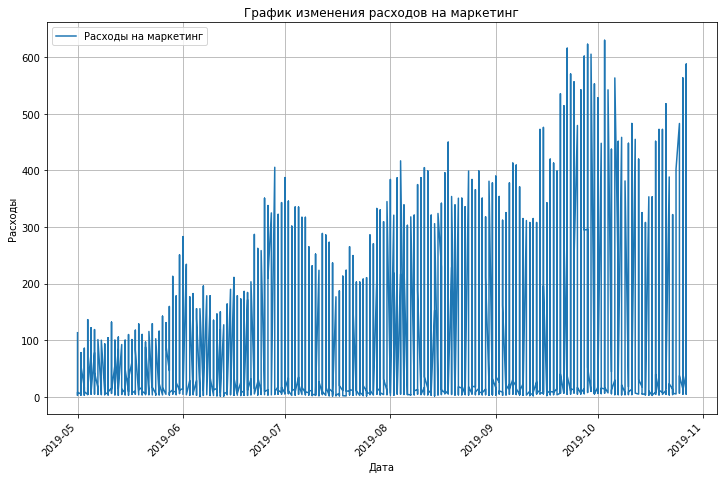

In [44]:
# посмотрим значения расходов на графике

cos.plot(y='costs',
           x='dt',
           figsize=(12, 8),
           grid=True,
           rot=45,        
           label='Расходы на маркетинг') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

**Вывод:** По графику видно, что с каждым месяцем расходы увеличивались и самые большие расходы были в сентября и октябре месяце и достигали 630, затем было снижение до 300 и к концу ноября почти достигла 600.

In [45]:
# посмотрим распределение расходов по источникам, сгруппируем их.

channel_cos = pd.DataFrame()
channel_cos['costs'] = cos.groupby('channel')['costs'].sum()
channel_cos['common'] = ((channel_cos['costs'] / cos['costs'].sum()))
channel_cos.sort_values(by='common', ascending=False).style.format({'common': '{:.2%}'})

,costs,common
channel,,
tiptop,54751.300000,51.90%
faceboom,32445.600000,30.75%
wahoonetbanner,5151.000000,4.88%
adnonsense,3911.250000,3.71%
opplecreativemedia,2151.250000,2.04%
rocketsuperads,1833.000000,1.74%
leapbob,1797.600000,1.70%
lambdamediaads,1557.600000,1.48%
mediatornado,954.480000,0.90%


**Вывод:** Большие суммы выделяются на tiptop (540751.3) 51.9%, faceboom (32 445.6) 30.75%, wahoonetbanner (5151) 4.88%, adnonsense (3911.25) 3.71%. На остальные источники выделяется от 0,9% (944,22) до 2,04% (2151,25).

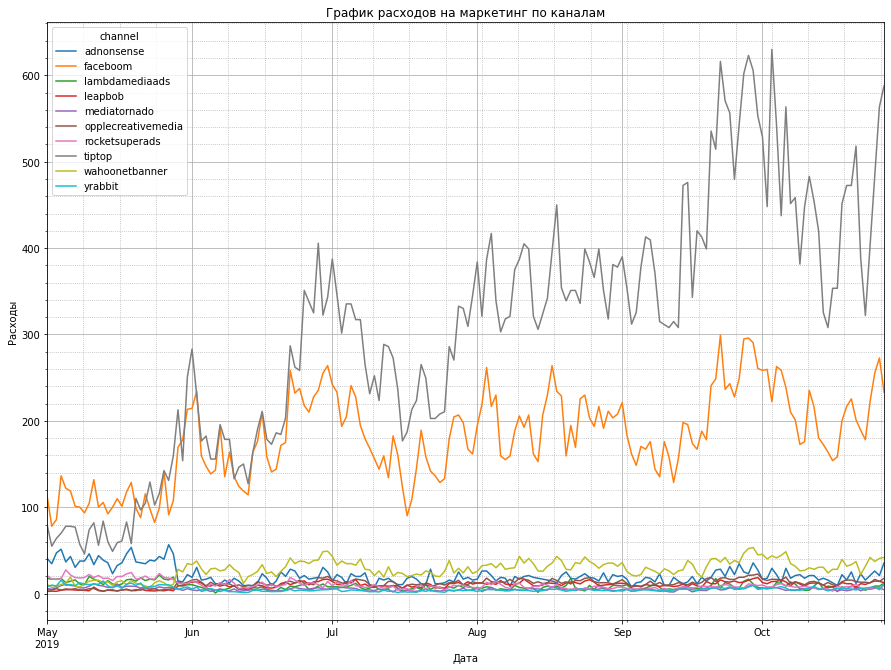

In [46]:
# построим график изменения расходом со временем
(cos
 .pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')
 .plot(figsize = (15, 11), grid = True, legend = True)
)

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('График расходов на маркетинг по каналам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

**Вывод:** График подверждает, что больше всего денег выделяется на источники tiptop и faceboom, которые увеличиваются со временем и достигают своего пика к октябрю месяцу. Остальные источники из общего графика совсем не выделяются и посмотреть их динамику затруднительно, лучше всего посмотреть на них в отдельном срезе.

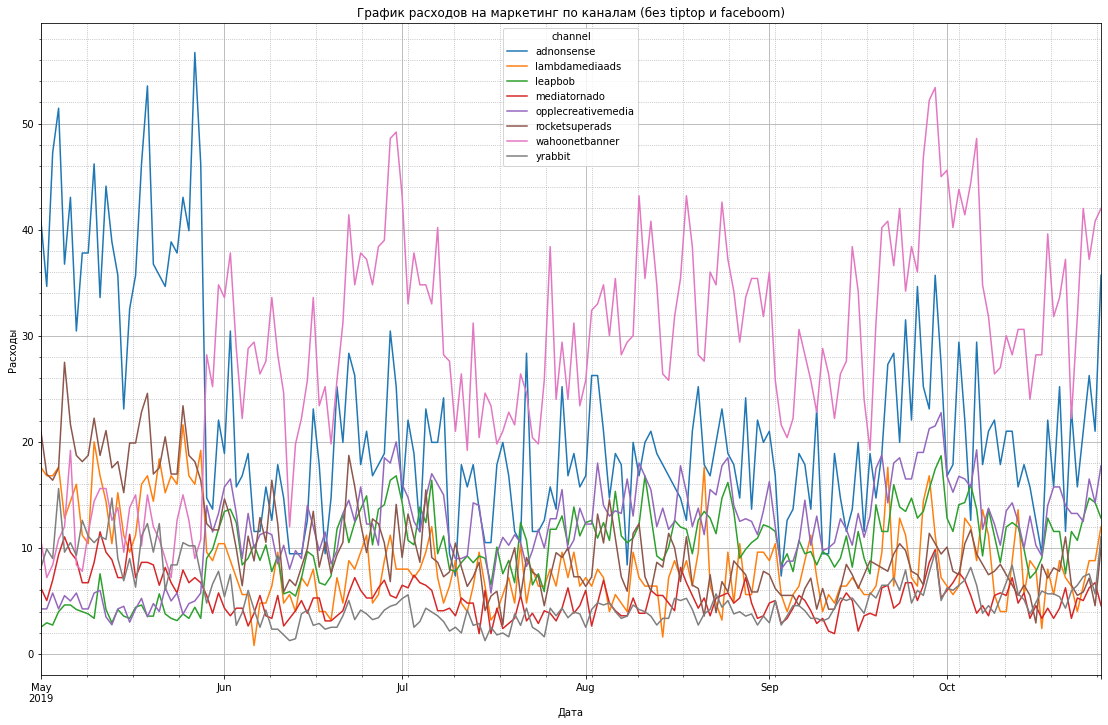

In [47]:
(cos
 .query('channel != ["tiptop", "faceboom"]')
 .pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')
 .plot(figsize = (19, 12), grid = True, legend = True)
)

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('График расходов на маркетинг по каналам (без tiptop и faceboom)')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

**Вывод:** В июне выделение денег на adnonsense уменьшились и находились в районе 10-30, а вот расходы на wahoonetbanner наоборот увеличились в то же время и достигали 53 в октябре.

<a name = "4.2."></a><font size = "3"><b>4.2 Расчитать сколько стоит привлечение пользователя</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [48]:
# для расчета расходов на привлечение пользователя будем использовать профиль пользователей

profiles.head()

,user_id,ft_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [49]:
#  у нас имеется столбец расходов его и будем использовать

display(round(profiles.describe(), 2))

,user_id,acquisition_cost
count,1.500080e+05,150008.00
mean,4.993238e+11,0.70
std,2.889483e+11,0.95
min,5.993260e+05,0.00
25%,2.489249e+11,0.00
50%,4.977046e+11,0.25
75%,7.494919e+11,1.11
max,9.999996e+11,3.72


Медианное значение привелечения пользователя составляет 0,24, а вот среднее 0,7, имеется бесплатное привелечение пользователей и самое дорогое 3,7. Возможно из-за выбросов такой большой разрыв между средним и медианным значением.

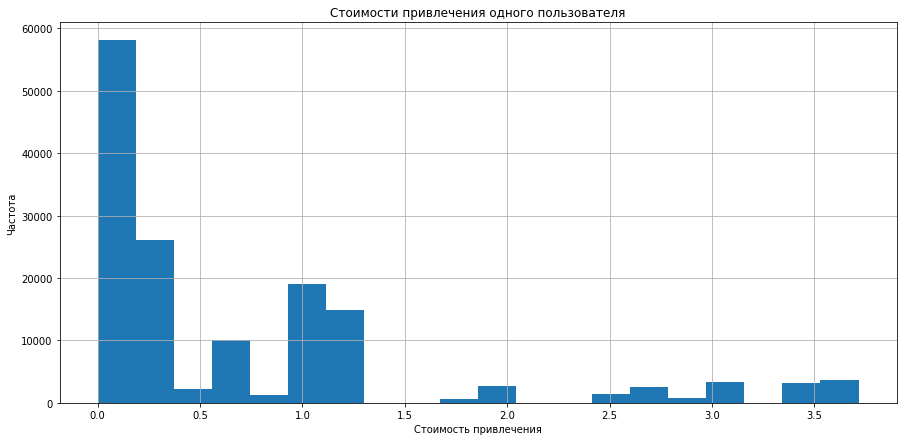

In [50]:
plt.figure(figsize = (15, 7))
profiles.acquisition_cost.hist(bins=20)
plt.title('Стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

**Вывод:** Много пользователей привлечено из источника organic, который не имеет расходов на привлечение пользователей. И для дальнейшего анализа уберем эти показатели из анализа.

In [51]:
# посмотрим на расходы по источникам

channel_cos_cac = pd.DataFrame()
channel_cos_cac['costs_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
channel_cos_cac.sort_values(by='costs_mean', ascending=False).style.format({'costs_mean': '{:.2f}'})

,costs_mean
channel,
tiptop,2.80
faceboom,1.11
adnonsense,1.01
lambdamediaads,0.72
wahoonetbanner,0.60
rocketsuperads,0.41
opplecreativemedia,0.25
yrabbit,0.22
mediatornado,0.22


**Вывод:** Самый дорогой средний источник привлечения пользователя равен 2,8, затем идет faceboom (1,11), adnonsense (1,01) и остальные в диапазоне от 0,21 до 0,72, а organic является бесплатным источником привлечения пользователей. И бесплатных пользователей стоит убрать из датафрейма, т.к. они будут влиять на общие показатели.

In [52]:
profiles = profiles.query('channel != "organic"')

<a name = "5."></a><font size = "4"><b>5. Оценить окупаемость рекламы</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [53]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

<a name = "5.1."></a><font size = "3"><b>5.1 Проанализировать общую окупаемость рекламы</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

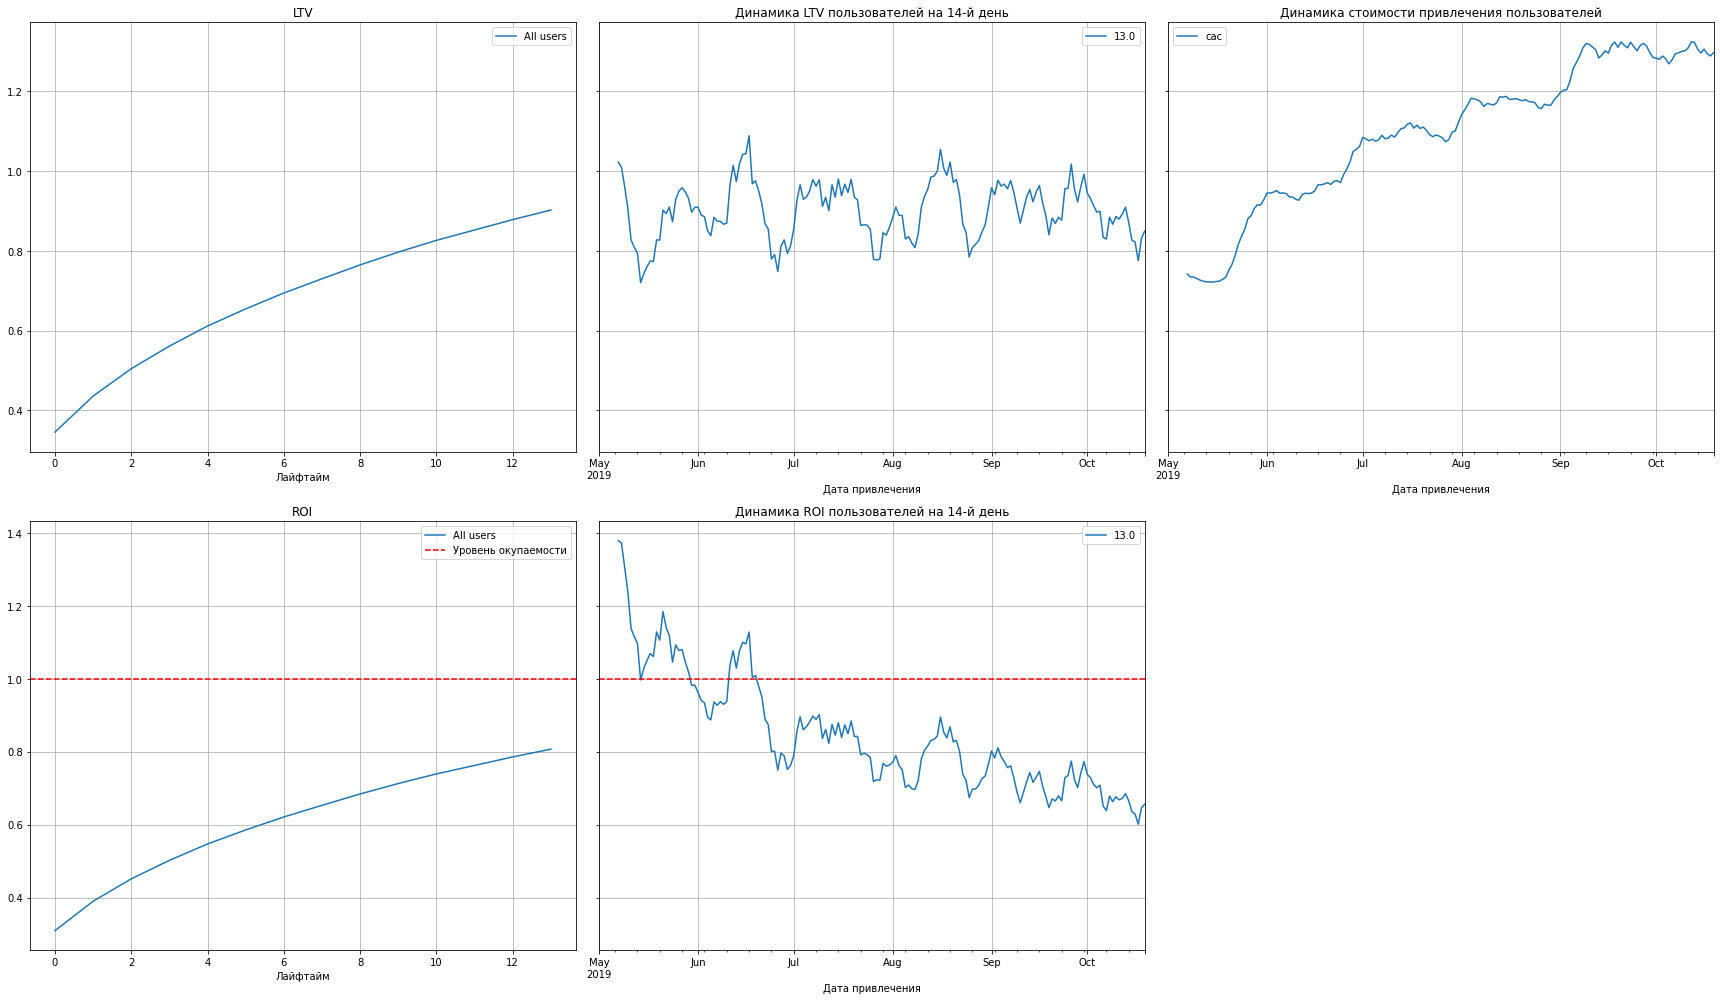

In [54]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, ordr, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Итог:**
- за две недели реклама не окупается, ROI составляет чуть выше 80%;
- стоимость рекламы увеличивается на протяжении всего времени, значительный скачок был в мае - июне;
- LTV пользователей за две недели стабилен на протяжении всего времени в диапазоне от 0,5 до 0,85;
- динамика ROI пользователей до июля показатель выше уровня окупаемости, но на графике нисходящий тренд, который опускается до 0,7.

<a name = "5.2."></a><font size = "3"><b>5.2 Проанализировать окупаемость рекламы с разбивкой по устройствам</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

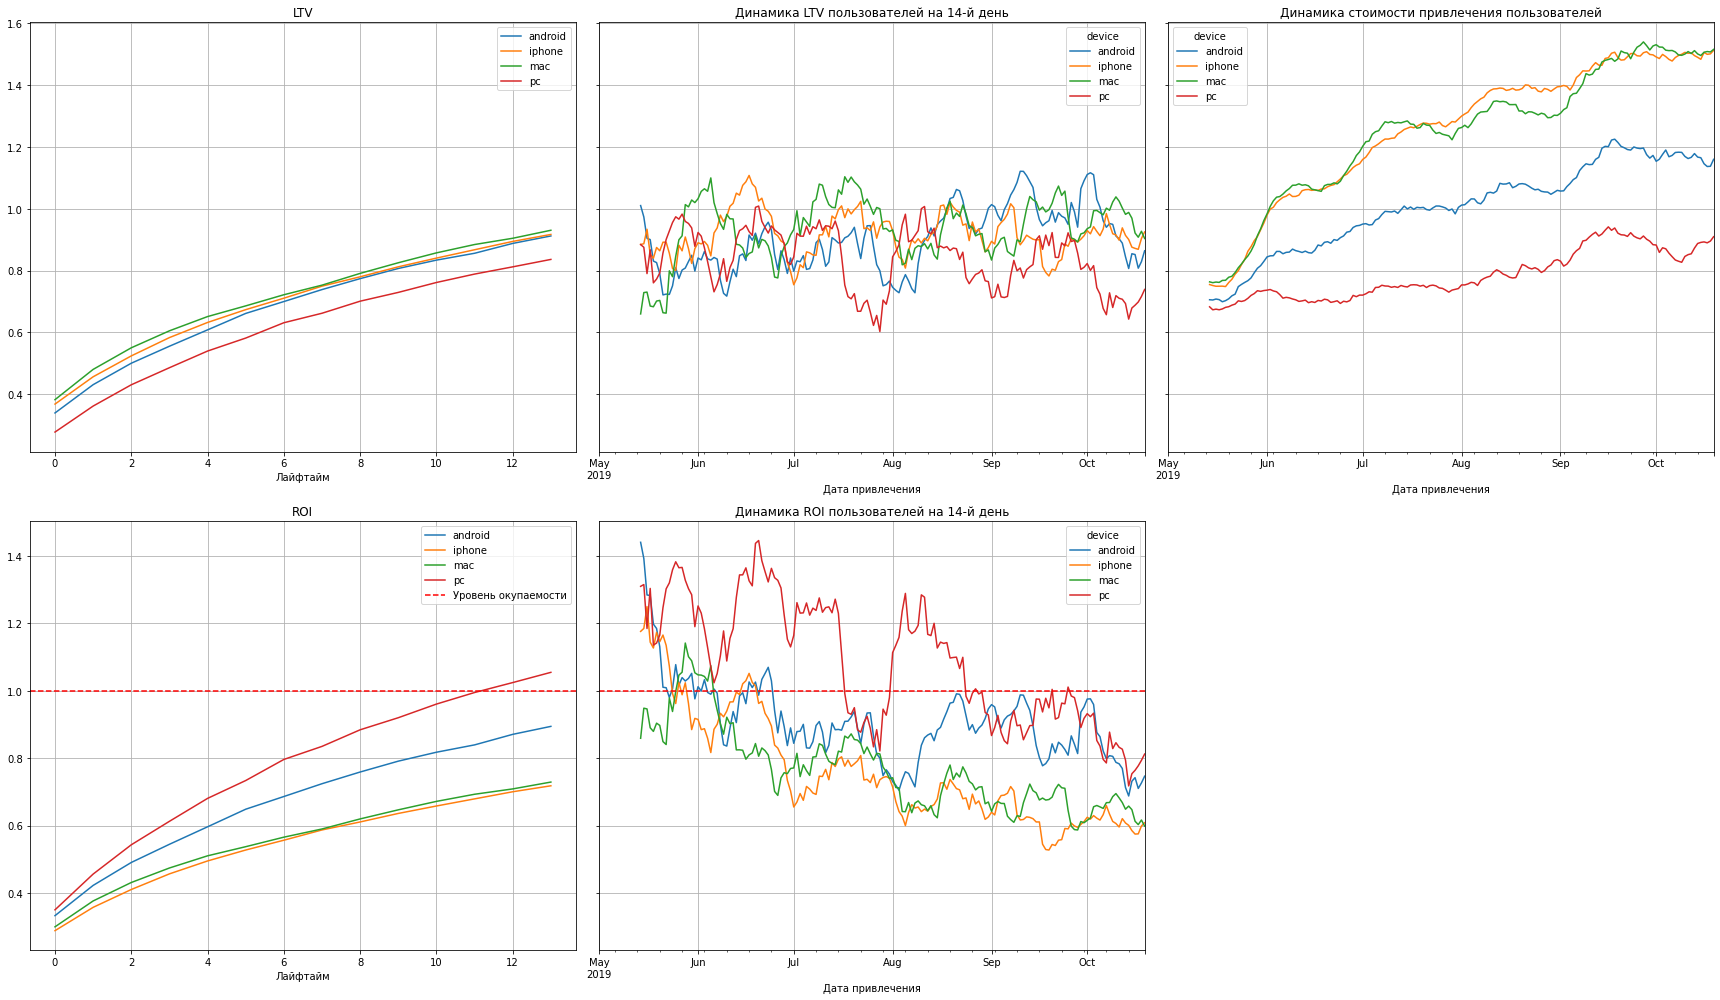

In [55]:
# посмотрим окупаемость по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, ordr, observation_date, horizon_days, dimensions = ['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14
) 

**Итог:**</br>
- до июня все четыре устройства были в зоне окупаймости, но затем сильно начали страдать iphone, android и mac;
- до сентября ROI пользователей pc был в зоне окупаймости, а все остальные устройства находились ниже уровня с июня месяца;
- по затратам на рекламу можно сказать, что с каждым месяцем выделялось все больше средств по всем устройствам, но больше всего на iphone и mac, но при этом они не окупились;
- LTV пользователей держалось весь цикл на одном уровне.

Стоит уделить внимание на сектор, в который больше всего выделяется средств и не оправдывает себя.

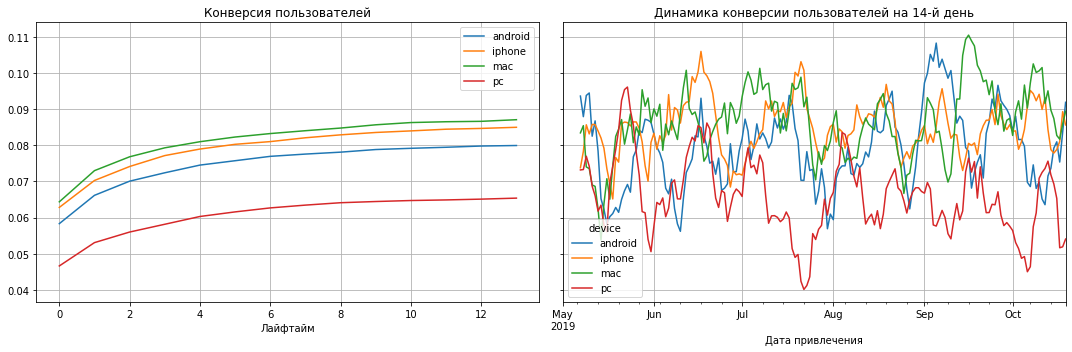

In [56]:
# посмотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, ordr, observation_date, horizon_days, dimensions = ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Итог:** Конверсия пользователей хорошо проявляется на протяжении всего времени и выделяются пользователи android, iphone, mac.

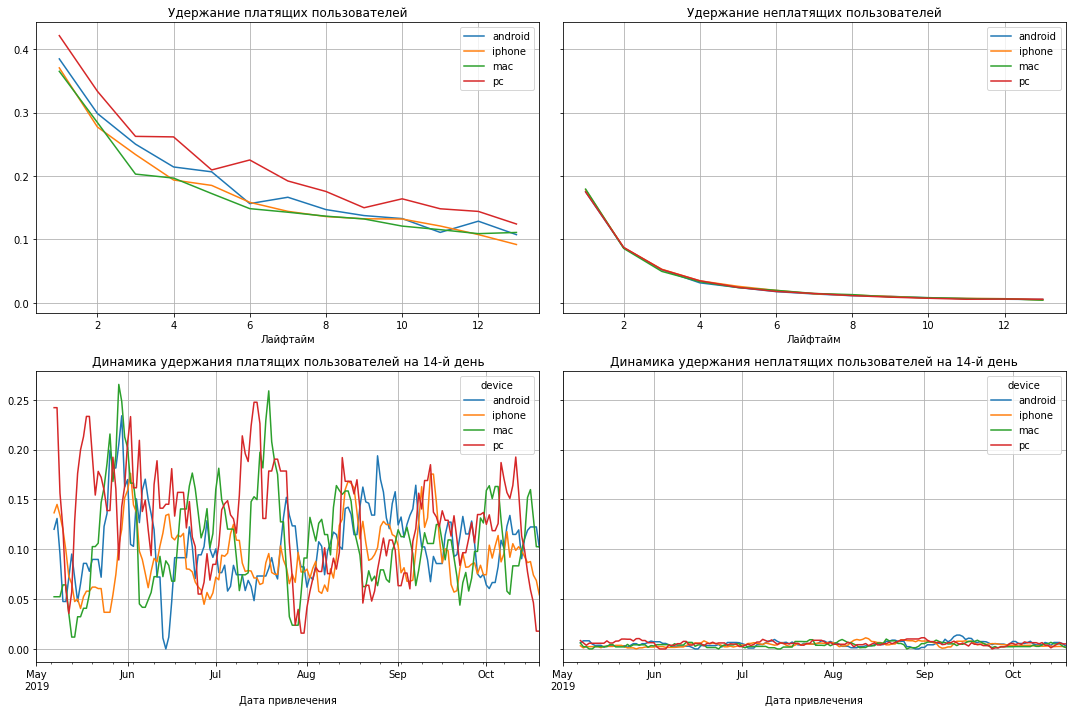

In [57]:
# посмотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, vis, observation_date, horizon_days, dimensions = ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Итог:** По графикам платящие пользователи, использующие устройства pc и android удерживаются хорошо по отношению к устройства mac и  iphone, особено можно выделить pc. У неплатящих картина обратная.

<a name = "5.3."></a><font size = "3"><b>5.3 Проанализировать окупаемость рекламы с разбивкой по странам</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

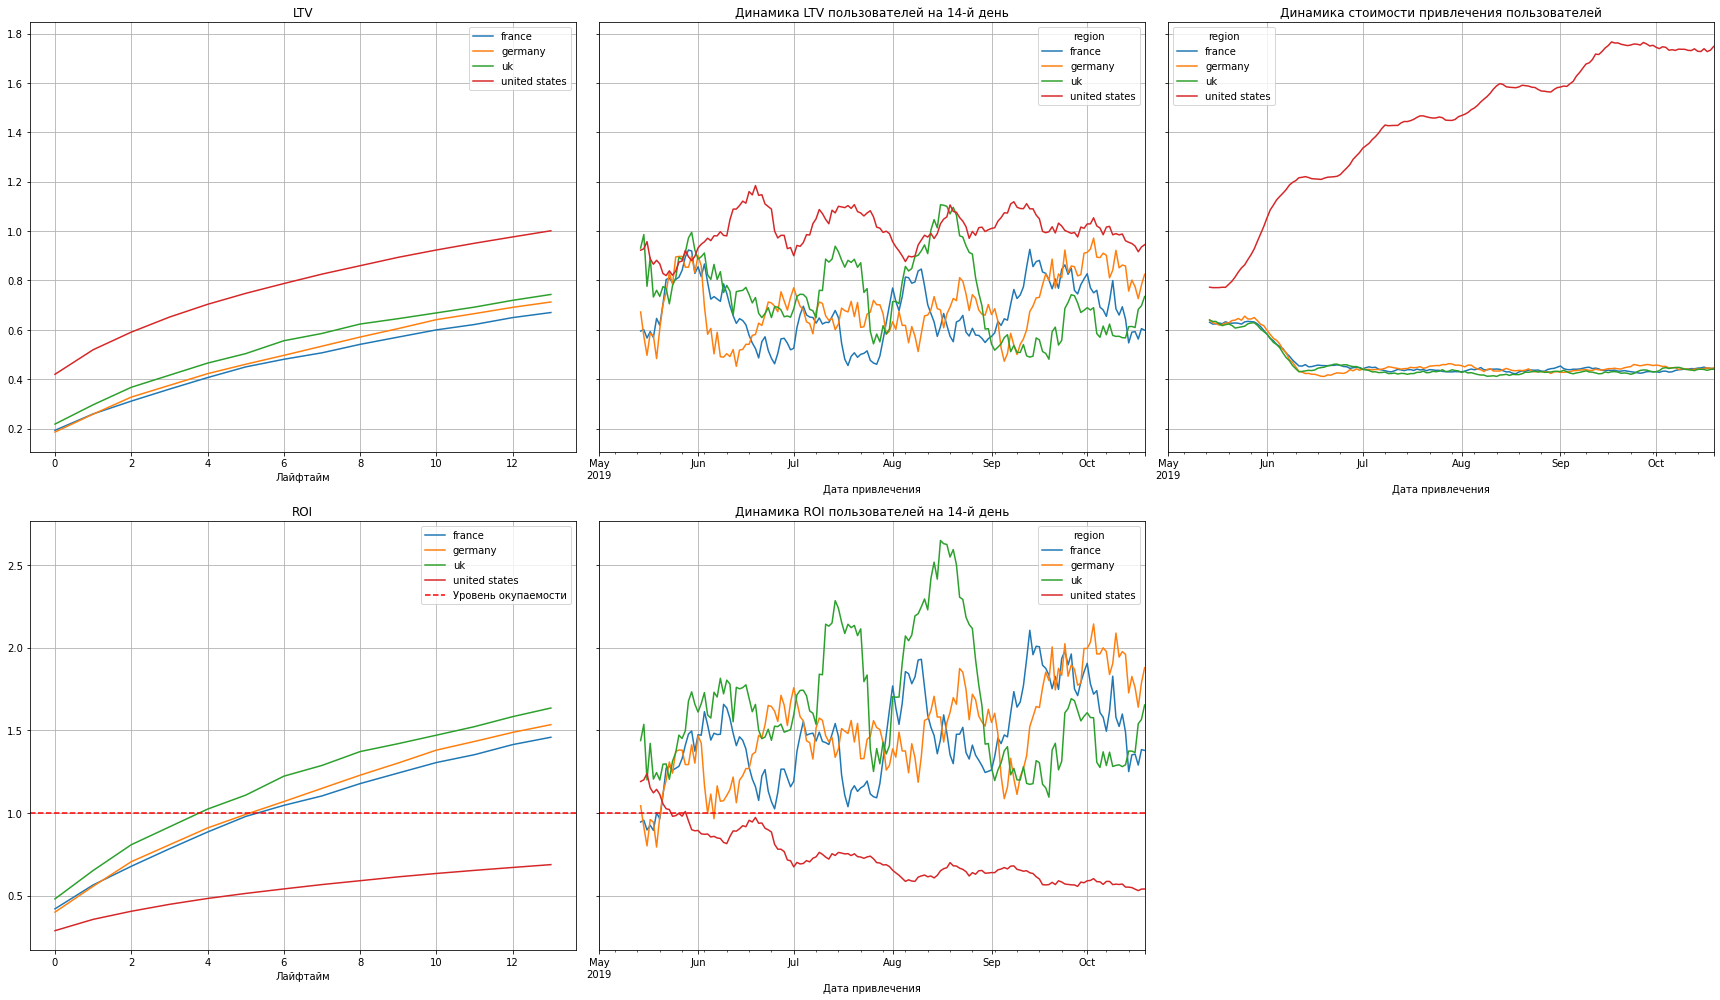

In [58]:
# посмотрим окупаемость по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, ordr, observation_date, horizon_days, dimensions = ['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Итог:**
- по графику реклама не окупается в США, хотя при этом больше всего пользователей именно из этой страны;
- больше всего потрачено ресурсов на рекламу в США и по графику на протяжении всего времени затраты растут;
- показатели по США отрицательные, но удержание пользователей стабильное;
- с самыми высокими показателями выделяются Англия, Германия, затем идет Франция.

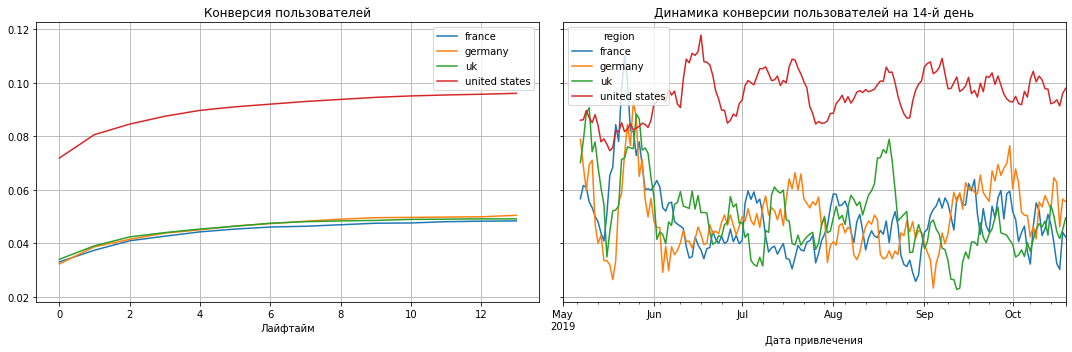

In [59]:
# посмотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, ordr, observation_date, horizon_days, dimensions = ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Итог:** К началу июня показатели конверсии пользователей из Англии, Германии, Франции сильно подскачили. Большой конверсией выделяется США, остальные страны находятся на одном уровне к концу второй недели.

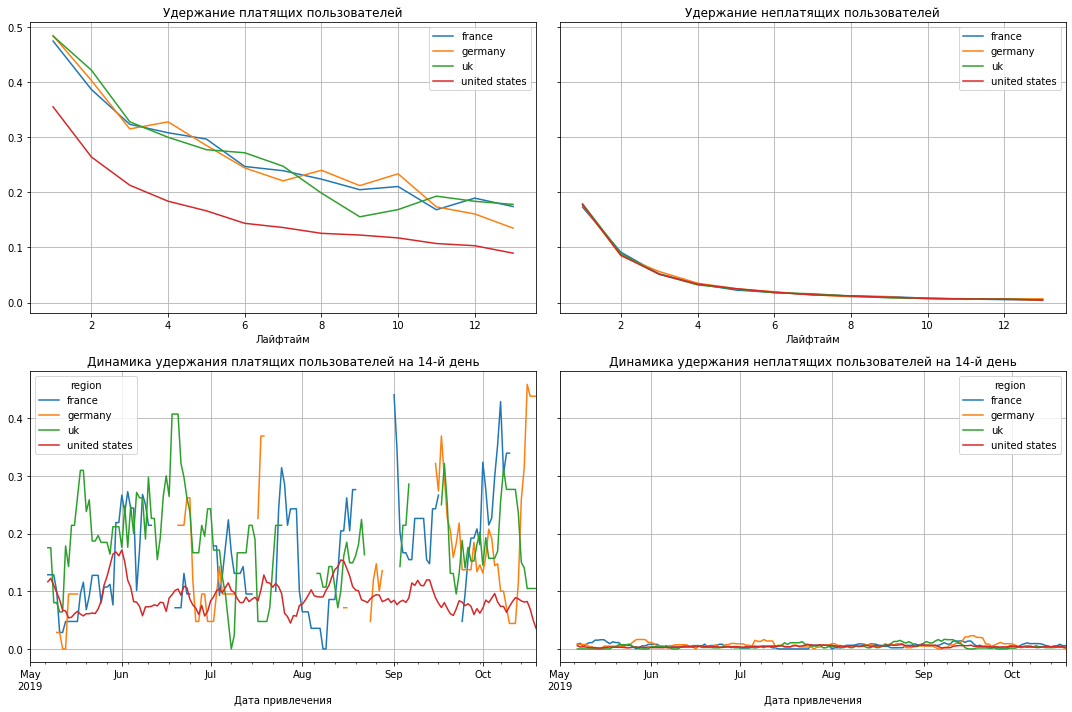

In [60]:
# посмотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, vis, observation_date, horizon_days, dimensions = ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Итог:** Высокую конверсию показывают пользователи из США, но вот покупки совершают пользователи других стран.

<a name = "5.4."></a><font size = "3"><b>5.4 Проанализировать окупаемость рекламы с разбивкой по каналам</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

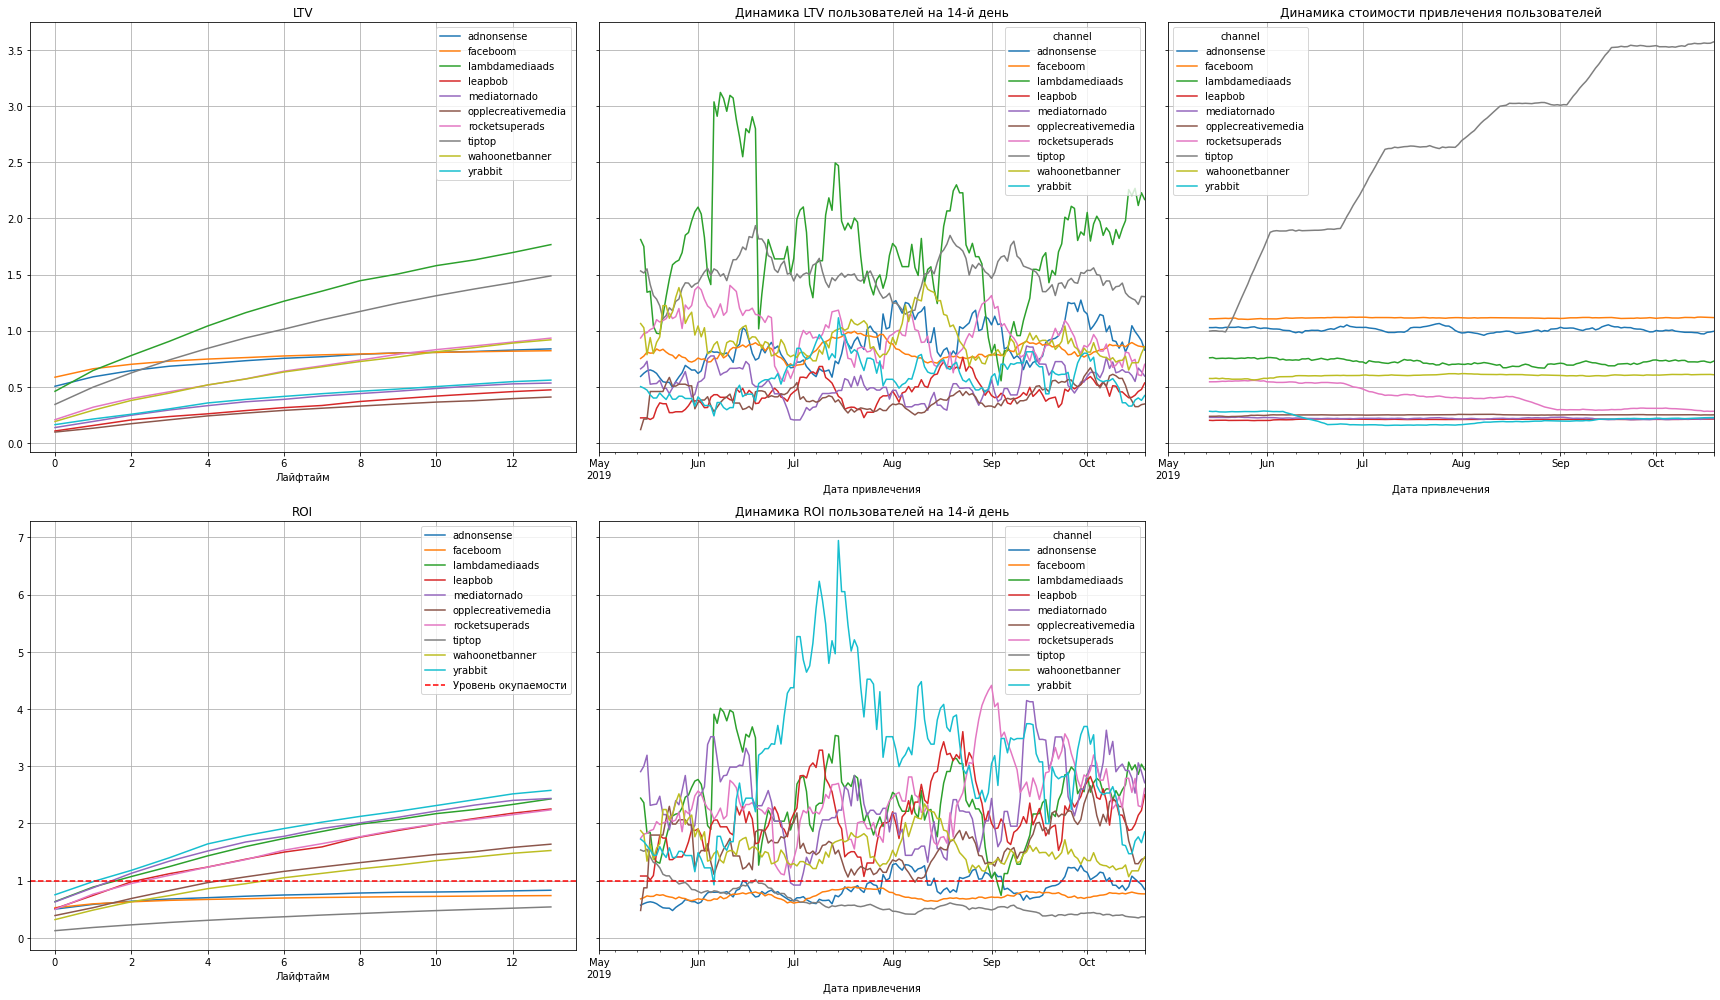

In [61]:
# посмотрим окупаемость с разбивкой по каналам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, ordr, observation_date, horizon_days, dimensions = ['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Итог:**
- Много средств и скаждым месяцем выделялось все больше на рекламу tiptop, а в итоге она не смогла окупиться, хотя в мае месяца находилась в зоне окупаймости. На остальные каналы выделялось в диапазоне от 0,3 до 1,1;
- Не окупились следующие рекламные сети: adnonsense, faceboom, tiptop;
- Самые высокие показатели были у рекламной сети: yrabbit, пиковые значения которой в середине июля достигали 7.

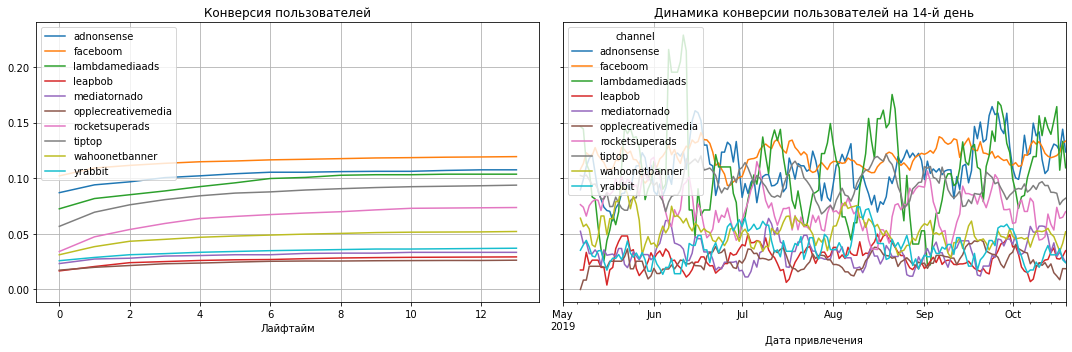

In [62]:
# посмотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, ordr, observation_date, horizon_days, dimensions = ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Итог:** Высокой конверсией обладали пользователи привлеченные из сетей: faceboom, adnonsense, lambdamediaads, tiptop. Самыми низкими показателями может похвастаться бесплатный источник opplecreativemedia.

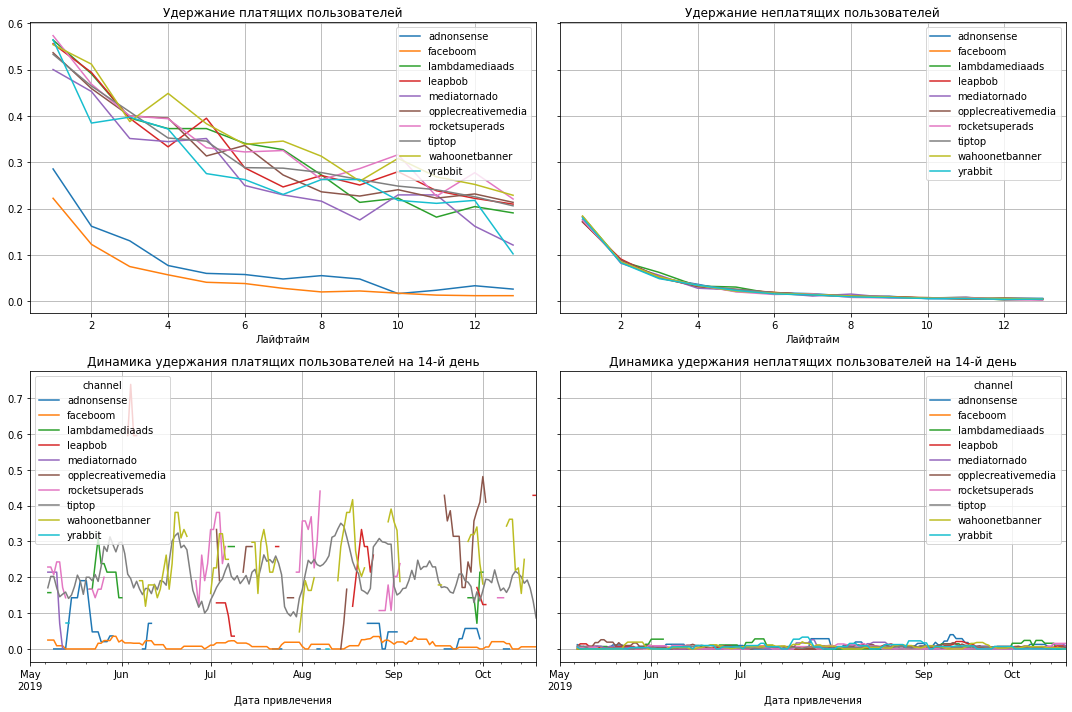

In [63]:
# посмотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, vis, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Итог:** Из платящих пользователей плохие показатели имеют рекламные сети adnonsense, faceboom.

**Вывод:**
- в целом можно сказать, что реклама практически достигла зоны окупаймости, где ROI показывает 80% окупаемости и при этом не включены бесплатные пользователи;
- как уже было отмечено, ресурсы потраченные на рекламу недали положительного результата, а именно рассмотренные по устройствам iphone и mac, по стране (США), по каналам (adnonsense, faceboom, tiptop). Если этим направлениям уделить внимания, то сможем выйти не только на уровень окупаемости, но и в плюс.

<a name = "6."></a><font size = "4"><b>6. Общий вывод</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "6.1."></a><font size = "3"><b>6.1 Выделить причины неэффективности привлечения пользователей</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Была поставлена **задача** — разобраться в причинах и помочь компании выйти в плюс.

________________<br/>
**► Загрузили и обработали для анализа первичные данные о визитах, покупках и расходов:**
- Проверили данные на повторные строки в таблицах с данными;
- Откорректировали названия столбцов, привели к общему регистру данные;
- Изменили тип данных у некоторых(с датами) столбцов.

________________<br/>
**►Написали функции для получения пользовательских профилей и для расчета, визуализации: LTV, ROI, конверсия, удержание.**

________________<br/>
**►Провели исследовательский анализ данных и выяснили из каких стран приходят пользователи, какими устройства пользуются и из каких источников привлечены:**
- Выяснили количество пользователей и конверсию в покупатели по странам, устройствам и источнику привлечения;
- Больше всего пользователей из США 100 тыс. и платящих из них 6,9% (6902). Далее на равне идут Англия 17 575 пользователей из них платящих 3,98% (700) и Франция 17 450 пользователей из них платящих 3,8% (663). Пользователей из Германии 14 981 из них платящих 4,11% (616);
- Наибольшее количество пользователей пользуется iphone 54 479 из них платящих 6,21% (3382), но большая доля платящих состоит из пользователей устройств mac 6.36% (1912) из 30042. Далее идут пользователи андройд 5,85% (2050) платящих из 35032 и пользователи пк 5,05% (1537) платящих из 30455;
- Больше всего пользователей привлечено из каналов organic (56 439) 37.62%, faceboom (29 144) 19.43%, tiptop (19561) 13.04%. А вот если говорит из какого источника больше всего платящих пользователей, то можно выделить faceboom (3557) 12.20%, adnonsense (440) 11.34%, lambdamediaads (225) 10.47%. Меньше всего платящих пользователей organic (1160) 2,06%, opplecreativemedia (233) 2,71% , leapbob (262) 3,06%.

________________<br/>
**►Определили сумму расходов на рекламу и на каждого привлеченного пользователя:**
- Общая сумма расходом на маркетинг: 105497.3;
- Большие суммы выделяются на tiptop (540751.3) 51.9%, faceboom (32 445.6) 30.75%, wahoonetbanner (5151) 4.88%, adnonsense (3911.25) 3.71%. На остальные источники выделяется от 0,9% (944,22) до 2,04% (2151,25);
- Самый дорогой средний источник привлечения пользователя равен 2,8, затем идет faceboom (1,11), adnonsense (1,01) и остальные в диапазоне от 0,21 до 0,72, а organic является бесплатным источником привлечения пользователей.

________________<br/>
**►Оценили окупаемость рекламы:**
- за две недели реклама не окупается, ROI составляет чуть выше 80%;
- стоимость рекламы увеличивается на протяжении всего времени, значительный скачок был в мае - июне;
- LTV пользователей за две недели стабилен на протяжении всего времени в диапазоне от 0,5 до 0,85;
- динамика ROI пользователей до июля показатель выше уровня окупаемости, но на графике нисходящий тренд, который опускается до 0,7.

Как уже было отмечено, ресурсы потраченные на рекламу не дали положительного результата, а именно рассмотренные по устройствам iphone и mac, по стране (США), по каналам (adnonsense, faceboom, tiptop). Если по этим направлениям уделить внимание мы выйдем не только на уровень окупаемости, но и в плюс.

 
 

<a name = "6.2."></a><font size = "3"><b>6.2 Сформулировать рекомендации для отдела маркетинга</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Обратить внимание на рекламные затраты для привлечения пользователей, использующих устройства mac и iphone. И трата ресурсов с каждым месяцем увеличивается. Прибыль не превышает затраты. Можно отметить, что с конверсией все в порядке, а вот на этапе покупки возможно возникают проблемы и показатели значительно падают и на это стоит обратить внимание.

Проводя анализ окупаймости рекламы с разбивкой по странам, выделяется США.<br/>
 * С каждым месяцем идет рост затрат на рекламу в Америке, а результат минусовой, но при этом пользователи из этой страны являются основной массой.
 * Высокие показатели окупаемости имеются такие страны как Англия и Германия. Стоит сбалансировать затраты на рекламу по всем четырем странам.
 * Может быть стоит в той стране, где удержание платящих пользователей больше, выделять больше денег на рекламу, а где-то наоборот уменьшить затраты.
 * Такого же плана корректировка касается рекламы с разбивкой по источникам.